In [1]:
import pypint

You are using Pint version 2016-12-15 and pypint 1.0rc2

## Model input

### Loading a model

The loading of a model is done with the function `pypint.load` which returns an abstract object representing the automata network. The format is guessed from the file extension.

The argument can either be a local path to a file, or a URL which will be downloaded prior to loading:

In [2]:
m = pypint.load("http://ginsim.org/sites/default/files/drosophilaCellCycleVariants.zginml")

Downloading 'http://ginsim.org/sites/default/files/drosophilaCellCycleVariants.zginml' to 'gen/pintaa2rr28wdrosophilaCellCycleVariants.zginml'

Source file is in zginml format, importing with logicalmodel

Invoking GINsim...

Simplifying model...

/home/pauleve/rech/pint/docs/src/doc/gen/pinthg0bfqmkdrosophilaCellCycleVariants.an

6 state(s) have been registered: NoCycD_Endocycle, G0, Cycle_Init, Syncytial_Cycles, Ago_Endocycle, Endocycle_init

The `load` function also supports importing models from [CellCollective](http://cellcollective.org) simply by supplying the URL to the model repository:

In [3]:
m2 = pypint.load("https://cellcollective.org/#4705/septation-initiation-network")

Downloading 'http://api.cellcollective.org/model/export/4705?type=SBML' to 'gen/pintcjqoq6wr4705.zip'

Source file is in sbml format, importing with logicalmodel

Simplifying model...

/home/pauleve/rech/pint/docs/src/doc/gen/pint1rjmd87_4705.an

Finally, within the Jupyter notebook web interface, a model can be uploaded by calling `load` without any argument. Once the file selected, it will be uploaded in the notebook, and loaded as a local file.

In [4]:
m3 = pypint.load()

### Initial state

An automata network comes with an initial state, associating to each automaton its starting local state.
Some formats, such as GINsim, allow to define different states that are identified with a name. In such a case, the `load` function displays the registered states.

The initial state of a model `m` is accessed using `m.initial_state`. It is a dict-like object which supports updating.

In [5]:
m.initial_state

{'Ago': 0,
 'CycA': 0,
 'CycB': 0,
 'CycD': 0,
 'CycE': 0,
 'Dap': 0,
 'E2F': 0,
 'Fzr': 0,
 'Fzy': 0,
 'Notch': 0,
 'Rb': 0,
 'Rux': 0,
 'Stg': 0,
 'Wee1': 0}

In [6]:
m.initial_state["CycE"] = 1  # modification of the initial state
m.initial_state.nonzeros()   # display only initial automata local states different from 0

{'CycE': 1}

Registered states are stored in `m.named_states` and can be directly assigned as the initial state:

In [7]:
m.initial_state = m.named_states["NoCycD_Endocycle"]
m.initial_state.changes() # display changes since the default initial state of the model

{'Dap': 1, 'Fzr': 1, 'Notch': 1, 'Rb': 1, 'Rux': 1}

In [8]:
m.initial_state.reset()    # restore to default initial state
m2 = m.having(CycE=1)      # having can take keyword arguments
m2 = m.having({"Notch": 1, "Stg": 1})   # .. or a dictionnary
m2 = m.having("NoCycD_Endocycle")       # .. or the name of a registered state

### Saving and exporting

A model can be saved to a local file, in Pint native format:

In [9]:
m.save_as("models/demo_droso.an")

/home/pauleve/rech/pint/docs/src/doc/models/demo_droso.an

### Model description

Basic statistics on the model can be obtained with the ``summary`` method:

In [10]:
m.summary()

{'max_local_states': 2,
 'nb_automata': 14,
 'nb_local_states': 28,
 'nb_states': 16384,
 'nb_transitions': 61}

* `max_local_states` gives the number of local states of the largest automaton;
* `nb_automata` is self explanatory
* `nb_local_states` is the sum of the number of local states in each automaton
* `nb_states` is the total number of global states (in our example, it corresponds to 2^14)
* `nb_transitions` is the number of defined local transitions

The list of automata and their local states and transitions can be accessed as follows:

In [11]:
m.automata

['Ago',
 'CycA',
 'CycB',
 'CycD',
 'CycE',
 'Dap',
 'E2F',
 'Fzr',
 'Fzy',
 'Notch',
 'Rb',
 'Rux',
 'Stg',
 'Wee1']

In [12]:
m.local_states

{'Ago': [0, 1],
 'CycA': [0, 1],
 'CycB': [0, 1],
 'CycD': [0, 1],
 'CycE': [0, 1],
 'Dap': [0, 1],
 'E2F': [0, 1],
 'Fzr': [0, 1],
 'Fzy': [0, 1],
 'Notch': [0, 1],
 'Rb': [0, 1],
 'Rux': [0, 1],
 'Stg': [0, 1],
 'Wee1': [0, 1]}

In [13]:
m.local_transitions[:5]

["Ago" 1 -> 0,
 "Dap" 1 -> 0 when "CycE"=0 and "Notch"=1,
 "CycA" 1 -> 0 when "Rb"=0 and "E2F"=0,
 "CycA" 1 -> 0 when "Rb"=0 and "E2F"=1 and "Fzr"=1 and "Fzy"=0,
 "CycA" 1 -> 0 when "Rb"=0 and "E2F"=1 and "Fzy"=1]

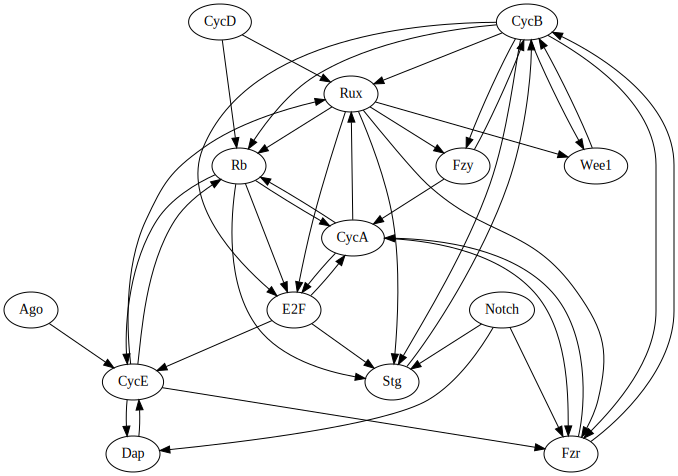

In [14]:
m.dependency_graph()

### Related functions and classes